In [2]:
!pip install plotly
!pip install pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.4/11.4 MB 10.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 499.4/499.4 kB 10.7 MB/s eta 0:00:00a 0:00:01


In [4]:
import polars as pl
import pandas as pd
import re
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
#import plotly as px
import plotly.express as px
source = "tabn322.10.xlsx"
#df2 = pl.read_excel(source)
df2 = pl.read_excel(source, read_csv_options={'skip_rows':1})
#df22 = df2.select(pl.col('Field of study'),pl.col('2019-20'))
#df3 = pl.read_excel(source, read_csv_options={'skip_rows':1})
df4 = pl.read_excel(source, read_csv_options={'skip_rows':1,'skip_rows_after_header':2})
df5 = df4.slice(0,-5)
df22 = df5[[s.name for s in df5 if not (s.null_count() == df5.height)]]


In [5]:
type(df22)

polars.internals.dataframe.frame.DataFrame

In [14]:
print([s.name for s in df22 if not (s.name == 'Field of study')])

['1970-71', '1975-76', '1980-81', '1985-86', '1990-91', '1995-96', '2000-01', '2005-06', '2010-11', '2011-12', '2012-13', '2013-14', '2014-15', '2015-16', '2016-17', '2017-18', '2018-19', '2019-20']


In [2]:
q = (
    df22
    .lazy()
    .select(
        [
            pl.col('Field of study').apply(lambda orig: re.sub('\\\\[0-9]+\\\\','', orig)),
            pl.exclude('Field of study')
        ]
    )
)
df66 = q.collect()
df66

Field of study,1970-71,1975-76,1980-81,1985-86,1990-91,1995-96,2000-01,2005-06,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17,2017-18,2018-19,2019-20
str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
"""Agriculture an...",12674,19402,21886,17191,13363,21757,23766,23497,29203,31629,34304,35953,37028,37827,38782,40334,41373,41848
"""Architecture a...",5570,9146,9455,9119,9781,8352,8480,9515,9831,9727,9757,9149,9090,8825,8579,8464,8806,9045
"""Area, ethnic, ...",2579,3577,2887,3021,4776,5633,6160,7878,8955,9228,8850,8275,7783,7840,7720,7717,7733,7767
"""Biological and...",35705,54154,43078,38395,39482,61014,60576,70602,89984,95850,100397,104657,109904,113794,116768,118661,121233,126590
"""Business""",115396,143171,200521,236700,249165,226623,263515,318043,365133,367235,360887,358132,363741,371690,381109,386240,390490,387851
"""Communication,...",10324,20045,29428,41666,51650,47320,58013,73658,83231,83771,84818,87612,90658,92551,93794,92289,92528,91752
"""Communications...",478,1237,1854,1479,1397,853,1178,2987,4858,4983,4987,4991,5135,4824,4615,4231,4444,4424
"""Computer and i...",2388,5652,15121,42337,25159,24506,44142,47702,43066,47406,50961,55271,59586,64402,71416,79597,88638,97047
"""Education""",176307,154437,108074,87147,110807,105384,105458,107235,104008,105656,104698,98838,91596,87221,85130,82599,83952,85057


In [16]:
type(df22)

polars.internals.dataframe.frame.DataFrame

In [5]:
qq = (
    df22
    .lazy()
    .with_columns(pl.col('Field of study').apply(lambda orig: re.sub('\\\\[0-9]+\\\\','', orig)))
    .with_columns(pl.col([s.name for s in df22 if not (s.name == 'Field of study')]).apply(lambda acc_frm: '{:>10,.0f}'.format(acc_frm)))
)
df66 = qq.collect()
df66

Field of study,1970-71,1975-76,1980-81,1985-86,1990-91,1995-96,2000-01,2005-06,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17,2017-18,2018-19,2019-20
str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""Agriculture an...",""" 12,674""",""" 19,402""",""" 21,886""",""" 17,191""",""" 13,363""",""" 21,757""",""" 23,766""",""" 23,497""",""" 29,203""",""" 31,629""",""" 34,304""",""" 35,953""",""" 37,028""",""" 37,827""",""" 38,782""",""" 40,334""",""" 41,373""",""" 41,848"""
"""Architecture a...",""" 5,570""",""" 9,146""",""" 9,455""",""" 9,119""",""" 9,781""",""" 8,352""",""" 8,480""",""" 9,515""",""" 9,831""",""" 9,727""",""" 9,757""",""" 9,149""",""" 9,090""",""" 8,825""",""" 8,579""",""" 8,464""",""" 8,806""",""" 9,045"""
"""Area, ethnic, ...",""" 2,579""",""" 3,577""",""" 2,887""",""" 3,021""",""" 4,776""",""" 5,633""",""" 6,160""",""" 7,878""",""" 8,955""",""" 9,228""",""" 8,850""",""" 8,275""",""" 7,783""",""" 7,840""",""" 7,720""",""" 7,717""",""" 7,733""",""" 7,767"""
"""Biological and...",""" 35,705""",""" 54,154""",""" 43,078""",""" 38,395""",""" 39,482""",""" 61,014""",""" 60,576""",""" 70,602""",""" 89,984""",""" 95,850""",""" 100,397""",""" 104,657""",""" 109,904""",""" 113,794""",""" 116,768""",""" 118,661""",""" 121,233""",""" 126,590"""
"""Business""",""" 115,396""",""" 143,171""",""" 200,521""",""" 236,700""",""" 249,165""",""" 226,623""",""" 263,515""",""" 318,043""",""" 365,133""",""" 367,235""",""" 360,887""",""" 358,132""",""" 363,741""",""" 371,690""",""" 381,109""",""" 386,240""",""" 390,490""",""" 387,851"""
"""Communication,...",""" 10,324""",""" 20,045""",""" 29,428""",""" 41,666""",""" 51,650""",""" 47,320""",""" 58,013""",""" 73,658""",""" 83,231""",""" 83,771""",""" 84,818""",""" 87,612""",""" 90,658""",""" 92,551""",""" 93,794""",""" 92,289""",""" 92,528""",""" 91,752"""
"""Communications...",""" 478""",""" 1,237""",""" 1,854""",""" 1,479""",""" 1,397""",""" 853""",""" 1,178""",""" 2,987""",""" 4,858""",""" 4,983""",""" 4,987""",""" 4,991""",""" 5,135""",""" 4,824""",""" 4,615""",""" 4,231""",""" 4,444""",""" 4,424"""
"""Computer and i...",""" 2,388""",""" 5,652""",""" 15,121""",""" 42,337""",""" 25,159""",""" 24,506""",""" 44,142""",""" 47,702""",""" 43,066""",""" 47,406""",""" 50,961""",""" 55,271""",""" 59,586""",""" 64,402""",""" 71,416""",""" 79,597""",""" 88,638""",""" 97,047"""
"""Education""",""" 176,307""",""" 154,437""",""" 108,074""",""" 87,147""",""" 110,807""",""" 105,384""",""" 105,458""",""" 107,235""",""" 104,008""",""" 105,656""",""" 104,698""",""" 98,838""",""" 91,596""",""" 87,221""",""" 85,130""",""" 82,599""",""" 83,952""",""" 85,057"""


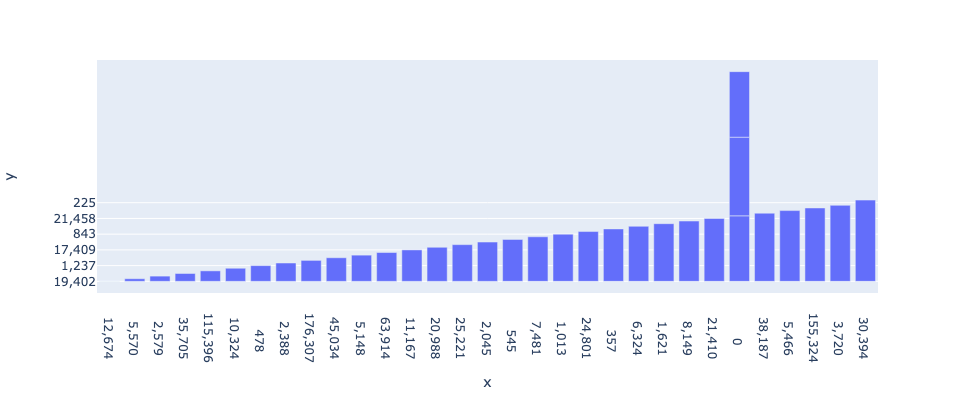

In [47]:
grafico = px.bar(x = df66.select('1970-71').to_series(),
                  y = df66.select('1975-76').to_series(),
                  width=600, height=400
                 )

grafico.show()

In [40]:
!jupyter labextension list

JupyterLab v3.6.1
/home/pyuser/.venv/share/jupyter/labextensions
        jupyterlab_pygments v0.2.2 enabled OK (python, jupyterlab_pygments)
        jupyterlab-plotly v5.13.1 enabled OK



In [45]:
!pip install jupyterlab-git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 10.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 2.6 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 2.9 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.7 MB/s eta 0:00:00


In [46]:
!jupyter server extension list

Config dir: /home/pyuser/.jupyter

Config dir: /home/pyuser/.venv/etc/jupyter
    jupyter_server_fileid enabled
    - Validating jupyter_server_fileid...
Package jupyter_server_fileid took 0.0021s to import
      jupyter_server_fileid 0.8.0 OK
    jupyter_server_mathjax enabled
    - Validating jupyter_server_mathjax...
Package jupyter_server_mathjax took 0.0008s to import
      jupyter_server_mathjax  OK
    jupyter_server_terminals enabled
    - Validating jupyter_server_terminals...
Package jupyter_server_terminals took 0.0061s to import
      jupyter_server_terminals 0.4.4 OK
    jupyter_server_ydoc enabled
    - Validating jupyter_server_ydoc...
Package jupyter_server_ydoc took 0.0151s to import
      jupyter_server_ydoc 0.6.1 OK
    jupyterlab enabled
    - Validating jupyterlab...
Package jupyterlab took 0.0591s to import
      jupyterlab 3.6.1 OK
    jupyterlab_git enabled
    - Validating jupyterlab_git...
Package jupyterlab_git took 0.0645s to import
      jupyterlab_git 0.41

In [48]:
!pip list

Package                  Version
------------------------ ---------
aiofiles                 22.1.0
aiosqlite                0.18.0
anyio                    3.6.2
argon2-cffi              21.3.0
argon2-cffi-bindings     21.2.0
arrow                    1.2.3
asttokens                2.2.1
attrs                    22.2.0
Babel                    2.12.1
backcall                 0.2.0
beautifulsoup4           4.11.2
bleach                   6.0.0
certifi                  2022.12.7
cffi                     1.15.1
charset-normalizer       3.1.0
colorama                 0.4.6
comm                     0.1.2
contourpy                1.0.7
cycler                   0.11.0
debugpy                  1.6.6
decorator                5.1.1
defusedxml               0.7.1
executing                1.2.0
fastjsonschema           2.16.3
fonttools                4.39.0
fqdn                     1.5.1
gitdb                    4.0.10
GitPython                3.1.31
idna                     3.4
ipykernel         